# Python para Análise de Dados

**Consulta os dados em mais de um dataset**

In [1]:
import pandas as pd

#### Carregando o dataset de pedidos

In [2]:
orders =pd.read_csv('datasets/olist_orders_dataset.csv')

In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Carregando o dataset de itens pedidos**

In [5]:
orders_items = pd.read_csv('datasets/olist_order_items_dataset.csv')

In [7]:
orders_items.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


**Opções de merge**

** Tipos de join (ligações)**
> - INNER JOIN (Padrão) - Retorna apenas os registros que contém a mesma chave em ambos os DataFrames.
> - LEFT JOIN - Retorna todos os registros do DataFrame à esquerda independente se contém um correspondente à direita.
> - RIGHT JOIN - Retorna todos os registros do DataFrame à direita independente se contém um correspondente à esquerda.
> - OUTER JOIN - Retorna todos os registros de ambos os DataFrames.

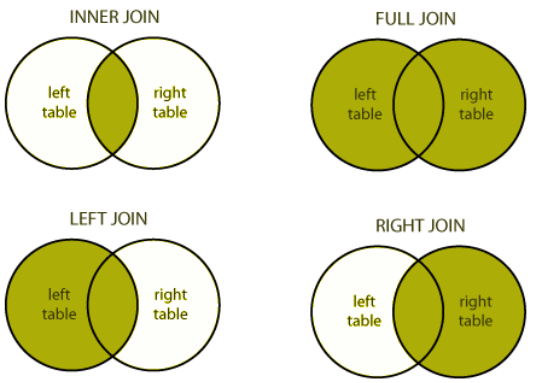

In [12]:
from IPython.display import Image
Image("joins.png")

** Consultando os dados nos dois datasets e ligando através da chave order_id**
- Selecionando os atributos do dataset **orders (pedidos)**.
> - order_id (id do pedido).
> - order_status (status do pedido).
> - order_approved_at (data e hora da aprovação do pedido).

- Selecionando os atributos do dataset **orders_items (itens do pedidos)**.
> - product_id (id do produto).
> - seller_id (id do vendedor).
> - price (preço do produto).
> - freight_value (valor do frete).

In [11]:
query = pd.merge(orders[['order_id','order_status','order_approved_at']],
                 orders_items[['order_id','product_id','seller_id','price','freight_value']],
                 on='order_id')

In [33]:
query.head()

,order_id,order_status,order_approved_at,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:27,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:23,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:45:59,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 22:20:29,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


** Consulta todos os pedidos independente se contém itens associados - Left Join**

In [12]:
query = pd.merge(orders[['order_id','order_status','order_approved_at']],
                 orders_items[['order_id','product_id','seller_id','price','freight_value']],
                 on='order_id',
                 how='left'
)

In [13]:
query.isnull().sum()

order_id               0
order_status           0
order_approved_at    161
product_id           775
seller_id            775
price                775
freight_value        775
dtype: int64

** Consulta todos itens pedidos independente se contém pedidos associados - Right Join**

In [14]:
query = pd.merge(orders[['order_id','order_status','order_approved_at']],
                 orders_items[['order_id','product_id','seller_id','price','freight_value']],
                 on='order_id',
                 how='right'
)

In [15]:
query.isnull().sum()

order_id              0
order_status          0
order_approved_at    15
product_id            0
seller_id             0
price                 0
freight_value         0
dtype: int64

** Consulta todos os registros nos dois DataFrames - Outer Join**

In [16]:
query = pd.merge(orders[['order_id','order_status','order_approved_at']],
                 orders_items[['order_id','product_id','seller_id','price','freight_value']],
                 on='order_id',
                 how='outer'
)

In [17]:
query.isnull().sum()

order_id               0
order_status           0
order_approved_at    161
product_id           775
seller_id            775
price                775
freight_value        775
dtype: int64